In [106]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve, GridSearchCV
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()

In [3]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
scaled_data = pd.DataFrame(data=scaled_data, columns=housing.feature_names)
scaled_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [7]:
X = scaled_data.values
y = housing.target

### training set and test set 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Hyper-parameters of RandomForest

1. max_depth 
- How deep the decision tree can be. The deeper the tree, the more splits it has & it captures more information about the data. However, in general a decision tree overfits for large depth values. Tree perfectly predicts all of the train data, however if fails to generalise the finding for new data. 
- If I set my max_depth too low, it is also not good. This will give the decision tree very little flexibility to capture the patterns & interactions in the training data. This will also cause the testing error to increase which is a case of underfitting.
- Therefore it is essential to find appropriate hyper-parameters by using grid-search or random-search.

2. min_samples_split 
- specifies the minimum number of samples required to split an internal node. 
- Specifiy a number to denote the minimum number 
- Specifiy a fraction to denote the percentage of samples in an internal node 

3. min_samples_leaf 
- minimum number of samples required to be at a leaf node.

4. difference between 2 & 3 
- The main difference between the two is that min_samples_leaf(3) gurantees a minimum number of samples in a leaf, while min_samples_split(2) can create arbitrary small leaves, though min_samples_split is more common in the literature.
- For instance, if min_samples_split = 5 & there are 7 samples at an internal node, then the split is allowed. But let's say the split results in two leaves, one with 1 sample, and another with 6 samples. If min_samples_leaf=2 then the split won't be allowed even if the internal node has 7 samples because one of the leaves resulted will have less then the minimum number of samples required to be at a leaf node. 

5. max_features 
- represents the number of features to consider when looking for the best split 
- specify a number to denote the max_features at each split or a fraction to denote the percentage of features to consider while making a split. 
- sqrt, log2, None 
- important to control overfitting. 

6. criterion: Gini, entropy (IG)

7. n_estimators 
- number of tress in the forest

8. bootstrap = True or False 
- method of selecting samples for training each time 



https://www.youtube.com/watch?v=XABw4Y3GBR4

### Optimise the hyperparameter on a validation set
### Plot the trade-off between time taken for training and prediction performance 

1. randomizedsearchCV

In [108]:
n_est = [int(x) for x in np.linspace(10, 500, 10)]
max_feaures = ['auto', 'sqrt', 'log2']
max_depth   = [10, 50]
min_samples_split = [2, 10]
min_samples_leaf  = [1, 4]
bootstrap = [True, False]

In [109]:
param_rand = {'n_estimators' : n_est,
              'max_features' : max_feaures,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap
             }

In [110]:
rf_model = RandomForestRegressor(random_state=1)

In [111]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_rand, cv=10, verbose=2, n_jobs=-1)

In [112]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.2min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   verbose=2)

In [113]:
rf_random.best_params_

{'n_estimators': 227,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

In [114]:
print("accuracy on training -->", rf_random.score(X_train, y_train))
print("accuracy on testing -->", rf_random.score(X_test, y_test))

accuracy on training --> 0.9597785437991059
accuracy on testing --> 0.8153288175990305


2. GridSearchCV

In [115]:
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_rand, cv=10, verbose=2, n_jobs=-1)

In [116]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 85.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 116.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 159.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 207.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 306.1min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 374.3min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391,
                                          445, 500]},
             verbose=2)

In [117]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 282}

In [118]:
print("accuracy on training -->", rf_grid.score(X_train, y_train))
print("accuracy on testing -->", rf_grid.score(X_test, y_test))

accuracy on training --> 1.0
accuracy on testing --> 0.8212656469577322


### the training and validation learning curves

In [141]:
rf_model_lc = RandomForestRegressor(n_estimators=282,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features='log2',
                                 max_depth=50,
                                 bootstrap=False
                                )

In [142]:
train_sizes, train_scores, val_scores = learning_curve(rf_model_lc, X_train, y_train, cv=10, n_jobs=-1, train_sizes=np.linspace(0.01, 1, 10), verbose=2)

[learning_curve] Training set sizes: [  130  1560  2990  4421  5851  7281  8712 10142 11572 13003]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:  3.4min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.9min finished


In [143]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

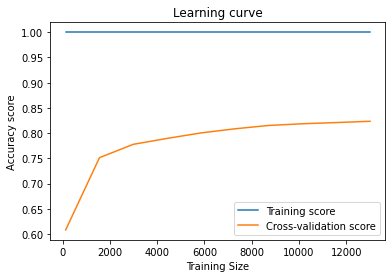

In [144]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

### Plot the relationship between a hyperparameter and the performance

#### 1. change number of tress in the forest 

In [145]:
rf_model_10_trees = RandomForestRegressor(n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=50, bootstrap=False)
rf_model_20_trees = RandomForestRegressor(n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=50, bootstrap=False)
rf_model_50_trees = RandomForestRegressor(n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=50, bootstrap=False)
rf_model_100_trees = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=50, bootstrap=False)    
rf_model_250_trees = RandomForestRegressor(n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=50, bootstrap=False)  
rf_model_500_trees = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=50, bootstrap=False)                  

In [146]:
rf_model_10_trees.fit(X_train, y_train)
print(rf_model_10_trees.score(X_train, y_train))
print(rf_model_10_trees.score(X_test, y_test))

1.0
0.7944291443091318


In [147]:
rf_model_20_trees.fit(X_train, y_train)
print(rf_model_20_trees.score(X_train, y_train))
print(rf_model_20_trees.score(X_test, y_test))

1.0
0.807279137629693


In [148]:
rf_model_50_trees.fit(X_train, y_train)
print(rf_model_50_trees.score(X_train, y_train))
print(rf_model_50_trees.score(X_test, y_test))

1.0
0.8235873540635765


In [149]:
rf_model_100_trees.fit(X_train, y_train)
print(rf_model_100_trees.score(X_train, y_train))
print(rf_model_100_trees.score(X_test, y_test))

1.0
0.82209423396704


In [150]:
rf_model_250_trees.fit(X_train, y_train)
print(rf_model_250_trees.score(X_train, y_train))
print(rf_model_250_trees.score(X_test, y_test))

1.0
0.8212358647408644


In [151]:
rf_model_500_trees.fit(X_train, y_train)
print(rf_model_500_trees.score(X_train, y_train))
print(rf_model_500_trees.score(X_test, y_test))

1.0
0.8215254616800189


#### 2. change max_features 

In [152]:
rf_model_auto = RandomForestRegressor(n_estimators=282, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=50, bootstrap=False)
rf_model_sqrt = RandomForestRegressor(n_estimators=282, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=50, bootstrap=False)
rf_model_log2 = RandomForestRegressor(n_estimators=282, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=50, bootstrap=False)

In [153]:
rf_model_auto.fit(X_train, y_train)
print(rf_model_auto.score(X_train, y_train))
print(rf_model_auto.score(X_test, y_test))

1.0
0.6170528028099285


In [154]:
rf_model_sqrt.fit(X_train, y_train)
print(rf_model_sqrt.score(X_train, y_train))
print(rf_model_sqrt.score(X_test, y_test))

1.0
0.8210832888517867


In [155]:
rf_model_log2.fit(X_train, y_train)
print(rf_model_log2.score(X_train, y_train))
print(rf_model_log2.score(X_test, y_test))

1.0
0.8222699251496253


#### 3. change max_depth

In [156]:
rf_model_5depth_trees = RandomForestRegressor(n_estimators=282, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=5, bootstrap=False)
rf_model_10depth_trees = RandomForestRegressor(n_estimators=282, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=10, bootstrap=False)
rf_model_20depth_trees = RandomForestRegressor(n_estimators=282, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=20, bootstrap=False)
rf_model_50depth_trees = RandomForestRegressor(n_estimators=282, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=50, bootstrap=False)    
rf_model_100depth_trees = RandomForestRegressor(n_estimators=282, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=100, bootstrap=False)      
rf_model_200depth_trees = RandomForestRegressor(n_estimators=282, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=200, bootstrap=False)  

In [157]:
rf_model_5depth_trees.fit(X_train, y_train)
print(rf_model_5depth_trees.score(X_train, y_train))
print(rf_model_5depth_trees.score(X_test, y_test))

0.677495440878147
0.652822753177431


In [158]:
rf_model_10depth_trees.fit(X_train, y_train)
print(rf_model_10depth_trees.score(X_train, y_train))
print(rf_model_10depth_trees.score(X_test, y_test))

0.8775727526237284
0.7834585489602587


In [159]:
rf_model_20depth_trees.fit(X_train, y_train)
print(rf_model_20depth_trees.score(X_train, y_train))
print(rf_model_20depth_trees.score(X_test, y_test))

0.9989941545955093
0.8184573740661295


In [160]:
rf_model_50depth_trees.fit(X_train, y_train)
print(rf_model_50depth_trees.score(X_train, y_train))
print(rf_model_50depth_trees.score(X_test, y_test))

1.0
0.8210096030994904


In [161]:
rf_model_100depth_trees.fit(X_train, y_train)
print(rf_model_100depth_trees.score(X_train, y_train))
print(rf_model_100depth_trees.score(X_test, y_test))

1.0
0.819490529278626


In [162]:
rf_model_200depth_trees.fit(X_train, y_train)
print(rf_model_200depth_trees.score(X_train, y_train))
print(rf_model_200depth_trees.score(X_test, y_test))

1.0
0.8206279155360449
